### 1. Import Libraries

In [1]:
# Import necessary libraries
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


### 2. Define Constants and Directories


In [2]:
# Define gestures and directories
GESTURES = ['swipe', 'push-pull', 'circular']
input_dir = '../data/raw/'  # Directory containing the raw JSON files
output_dir = '../data/processed/'  # Directory to save processed data

### 3. Function to Load JSON Files
This function reads each JSON file and creates a DataFrame with timestamp as the index and rssi values.

In [3]:
def read_rssi_json(file_path):
    """
    Reads a JSON file and returns a DataFrame with timestamp and RSSI values.
    """
    with open(file_path, 'r') as file:
        data = json.load(file)
    
    records = []
    for entry in data:
        timestamp = datetime.strptime(entry['timestamp'], '%Y-%m-%d %H:%M:%S.%f')
        records.append({'timestamp': timestamp, 'rssi': entry['rssi']})
    
    df = pd.DataFrame(records)
    df.set_index('timestamp', inplace=True)
    return df

### 4. Exploratory Data Analysis (EDA) Function
This function performs basic EDA by plotting time series and histogram of RSSI values for each gesture.



In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

def perform_eda1(df, gesture):
    """
    Performs EDA for the RSSI data, including:
    1. RSSI time series plot
    2. RSSI histogram
    """
    print(f"Performing EDA for {gesture} gesture.")
    print(df.describe())  # Summary statistics

    # ------------------- Plot 1: RSSI Time Series -------------------
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['rssi'], label=f'{gesture.capitalize()} RSSI', color='teal', linewidth=2.0)

    plt.title(f'{gesture.capitalize()} Gesture - Raw RSSI Over Time', fontsize=14, fontweight='semibold')
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('RSSI Value', fontsize=12)
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.legend(fontsize=10, loc='upper right', frameon=True, shadow=True)
    plt.tight_layout()
    plt.show()

    # ------------------- Plot 2: RSSI Histogram -------------------
    plt.figure(figsize=(8, 5))
    sns.histplot(df['rssi'], bins=30, kde=True, color='mediumseagreen', edgecolor='black', linewidth=1.2)
    plt.title(f'{gesture.capitalize()} Gesture - RSSI Distribution', fontsize=16, fontweight='bold')
    plt.xlabel('RSSI', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()


def perform_eda2(df, gesture):
    """
    Performs EDA for the RSSI data, including:
    1. RSSI scatter plot with trendline
    2. RSSI histogram
    """
    print(f"Performing EDA for {gesture} gesture.")
    print(df.describe())  # Summary statistics

    # ------------------- Plot 1: RSSI Scatter Plot with Trendline -------------------
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=df.index, y=df['rssi'], color='blue', alpha=0.6, label='RSSI Values')
    sns.regplot(x=np.arange(len(df)), y=df['rssi'], scatter=False, color='red', label='Trendline')

    plt.title(f'{gesture.capitalize()} Gesture - RSSI Over Time', fontsize=14, fontweight='medium')
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('RSSI Value', fontsize=12)
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.legend(fontsize=10, loc='upper right', frameon=True, shadow=True)
    plt.tight_layout()
    plt.show()

    # ------------------- Plot 2: RSSI Histogram -------------------
    plt.figure(figsize=(8, 5))
    sns.histplot(df['rssi'], bins=30, kde=True, color='mediumseagreen', edgecolor='black', linewidth=1.2, alpha=0.9)
    plt.title(f'{gesture.capitalize()} Gesture - RSSI Distribution', fontsize=14, fontweight='medium')
    plt.xlabel('RSSI', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()


def perform_eda(df, gesture):
    """
    Performs EDA for the RSSI data, including:
    1. RSSI time series line plot
    2. RSSI histogram
    """
    print(f"Performing EDA for {gesture} gesture.")
    print(df.describe())  # Summary statistics

    # ------------------- Plot 1: RSSI Time Series Line Plot -------------------
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['rssi'], label=f'{gesture.capitalize()} RSSI', color='royalblue', linewidth=2.0)
    plt.fill_between(df.index, df['rssi'], alpha=0.1, color='royalblue')  # Add subtle shading under the curve

    plt.title(f'{gesture.capitalize()} Gesture - RSSI Over Time', fontsize=14, fontweight='medium')
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('RSSI Value', fontsize=12)
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.legend(fontsize=10, loc='upper right', frameon=True, shadow=True)
    plt.tight_layout()
    plt.show()

    # ------------------- Plot 2: RSSI Histogram -------------------
    plt.figure(figsize=(8, 5))
    sns.histplot(df['rssi'], bins=30, kde=True, color='mediumseagreen', edgecolor='black', linewidth=1.2, alpha=0.9)
    plt.title(f'{gesture.capitalize()} Gesture - RSSI Distribution', fontsize=14, fontweight='medium')
    plt.xlabel('RSSI', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show


### 5. Preprocess Function for Resampling, Smoothing, and Interpolation
This function resamples the RSSI data, applies a moving average for smoothing, and interpolates missing values.

In [5]:
def preprocess_rssi_data(df, resample_interval='10ms'):
    """
    Resamples, smooths, and interpolates the RSSI data.
    """
    # Resample to regular interval
    df_resampled = df.resample(resample_interval).mean()
    
    # Smooth the data using a 3-point moving average
    df_resampled['rssi'] = df_resampled['rssi'].rolling(window=3, min_periods=1).mean()
    
    # Interpolate to fill any remaining missing values
    df_resampled['rssi'] = df_resampled['rssi'].interpolate()
    
    return df_resampled

### 6. Windowing Function for Sequence Creation
This function creates fixed-size windows from the processed data for model training.

In [6]:
def create_sequences(df, window_size='1s', step_size='0.5s'):
    """
    Creates fixed-size sequences (windows) of the data for model training.
    """
    sequences = []
    labels = []
    
    # Define start and end times for sliding window
    start_time = df.index.min()
    end_time = df.index.max()
    current_start = start_time
    current_end = current_start + pd.Timedelta(window_size)

    # Slide the window over the data
    while current_end <= end_time:
        window = df.loc[current_start:current_end]
        if len(window) > 0:
            sequences.append(window['rssi'].values)
        
        # Shift the window by step_size
        current_start += pd.Timedelta(step_size)
        current_end = current_start + pd.Timedelta(window_size)
    
    return np.array(sequences)

### 7. Run EDA and Preprocessing on All Gesture Files
This section performs EDA, preprocessing, sequence creation, and saves the processed data in .npz format.

In [7]:
def preprocess_gesture_files(input_dir, output_dir, resample_interval='10ms', window_size='1s', step_size='0.5s'):
    """
    Reads gesture files, performs EDA, preprocesses, creates sequences,
    and saves the data in .npz format.
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    all_sequences = []
    all_labels = []

    for gesture in GESTURES:
        file_path = os.path.join(input_dir, f'{gesture}_rssi.json')
        
        # Step 1: Read the JSON file
        df = read_rssi_json(file_path)
        
        # Step 2: Perform EDA to analyze data patterns and noise
        perform_eda(df, gesture)
        
        # Step 3: Resample, smooth, and interpolate
        df_preprocessed = preprocess_rssi_data(df, resample_interval)
        
        # Step 4: Create sequences from the preprocessed data
        sequences = create_sequences(df_preprocessed, window_size, step_size)
        
        # Step 5: Label each sequence according to gesture
        label = GESTURES.index(gesture)
        labels = np.full(len(sequences), label)
        
        # Append data
        all_sequences.append(sequences)
        all_labels.append(labels)
    
    # Combine sequences and labels across gestures
    all_sequences = np.concatenate(all_sequences, axis=0)
    all_labels = np.concatenate(all_labels, axis=0)
    
    # Step 6: Save to .npz file
    np.savez_compressed(os.path.join(output_dir, 'gesture_data.npz'), data=all_sequences, labels=all_labels)
    print(f'Processed data saved to: {output_dir}/gesture_data.npz')


### 8. Run the Preprocessing Pipeline
Execute the preprocessing pipeline on all gesture files. Run this cell to preprocess the data and save it in .npz format.

Performing EDA for swipe gesture.
              rssi
count  1449.000000
mean    -52.939959
std      32.283082
min     -96.000000
25%     -93.000000
50%     -30.000000
75%     -28.000000
max     -21.000000


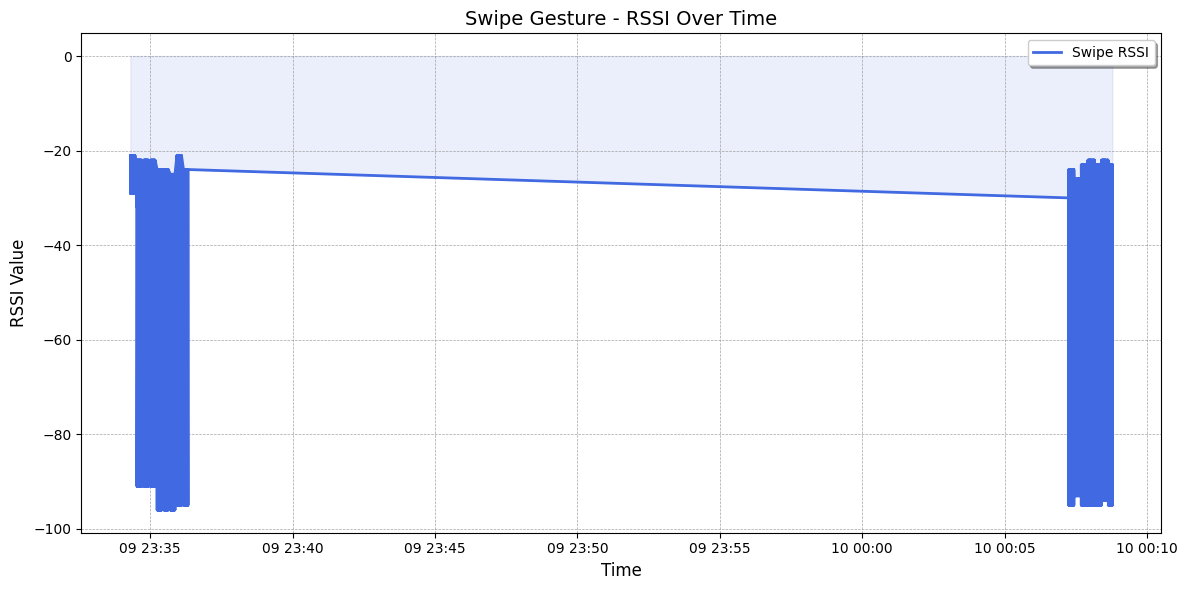

Performing EDA for push-pull gesture.
              rssi
count  1650.000000
mean    -50.189091
std      30.933613
min     -96.000000
25%     -92.000000
50%     -32.000000
75%     -28.000000
max     -21.000000


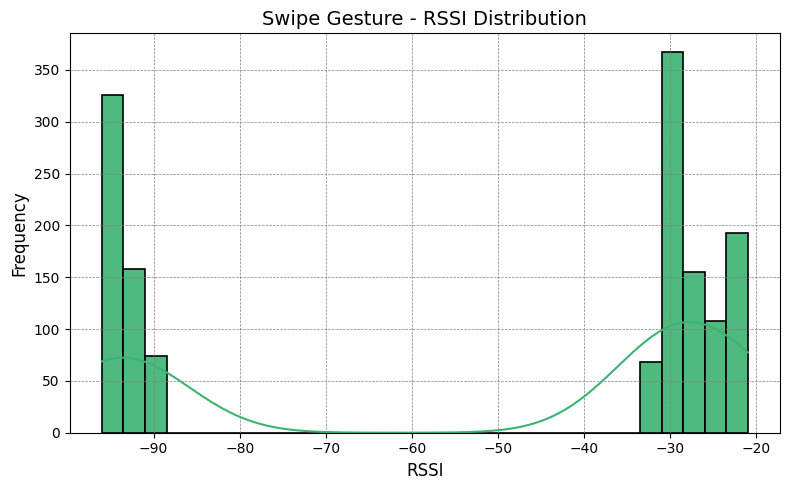

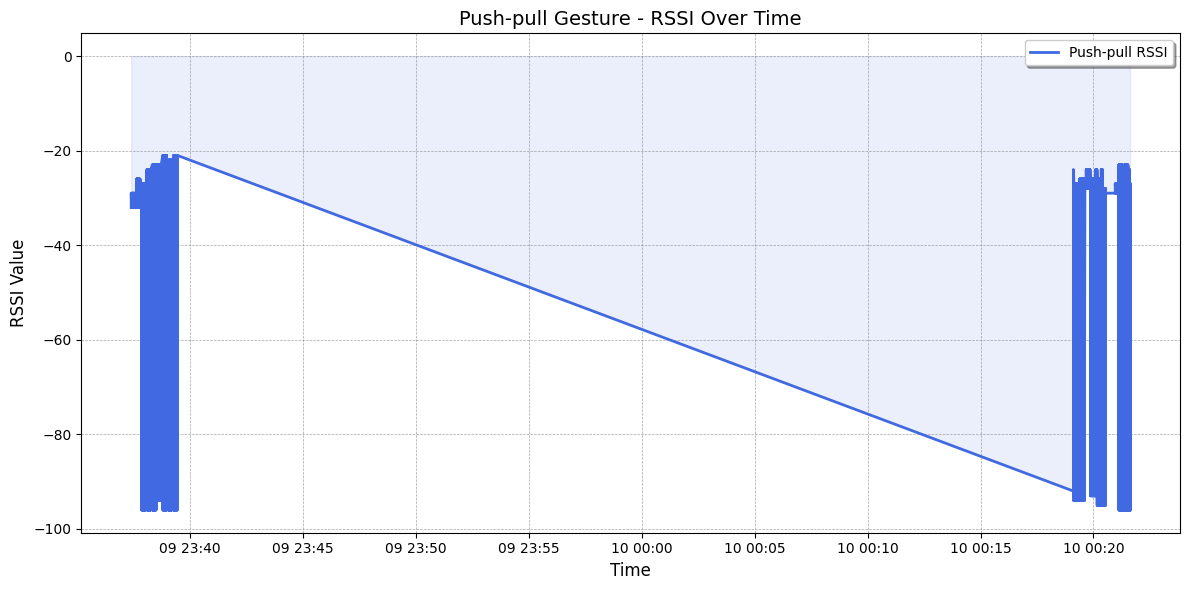

Performing EDA for circular gesture.
              rssi
count  1448.000000
mean    -55.155387
std      30.870060
min     -96.000000
25%     -93.000000
50%     -33.000000
75%     -31.000000
max     -20.000000


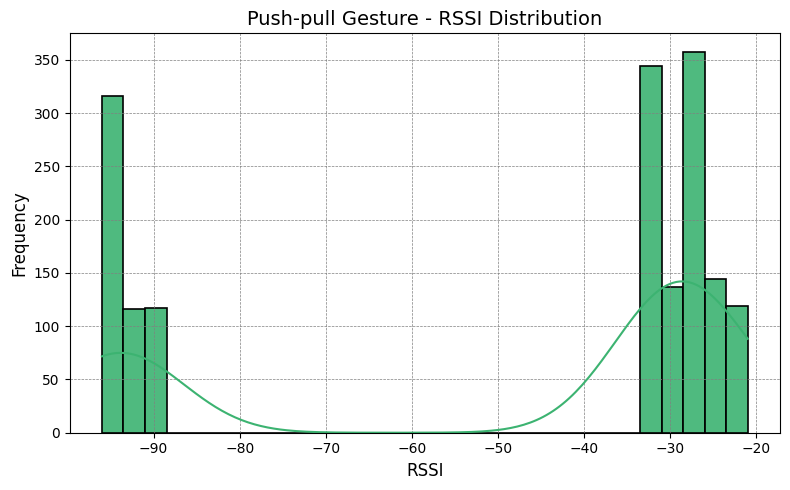

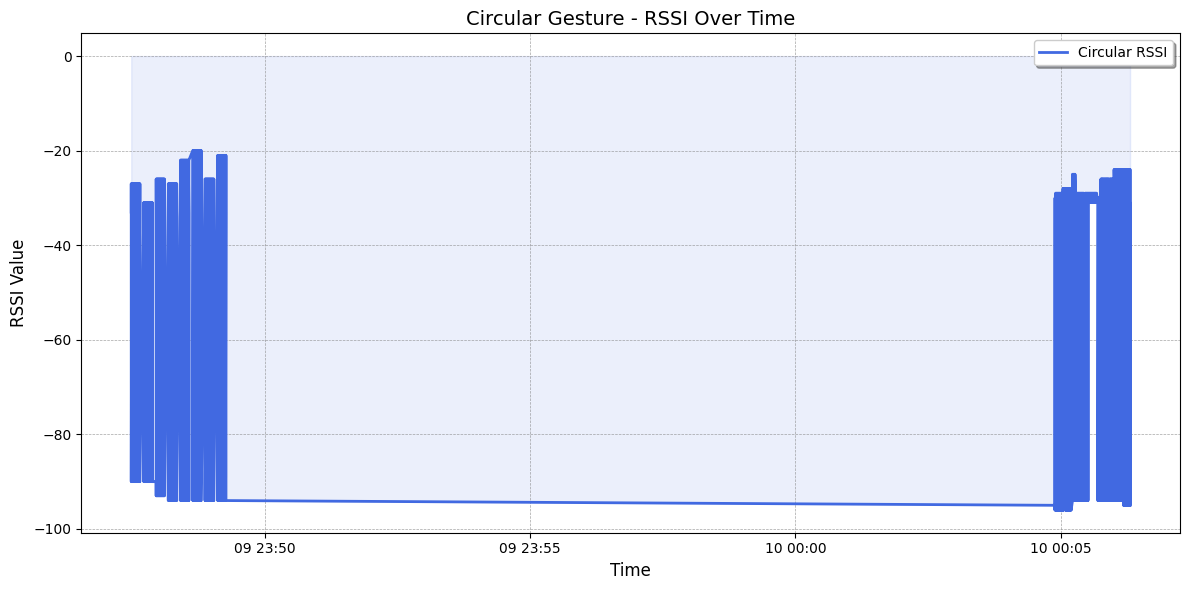

Processed data saved to: ../data/processed//gesture_data.npz


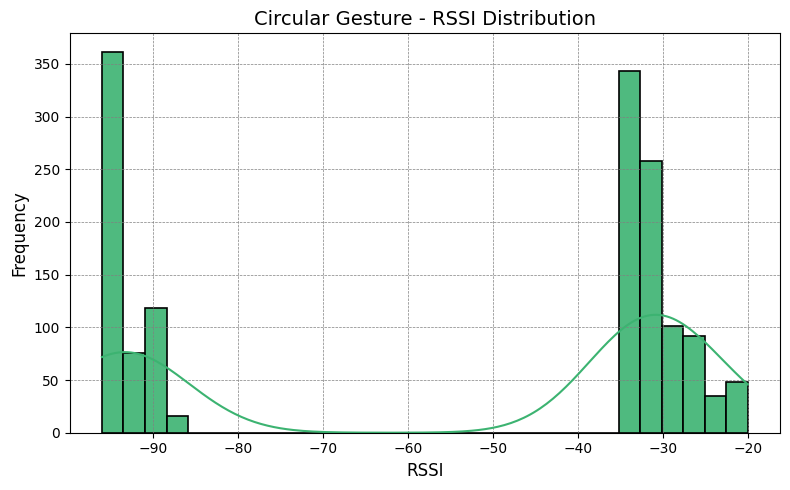

In [8]:
# Run preprocessing on all gesture files
preprocess_gesture_files(input_dir, output_dir)